# Hyperparameter Selection 1

From here: https://dmbee.github.io/seglearn/auto_examples/plot_model_selection1.html

## Overview

This example demonstrates how to do model selection in a feature representation pipeline using a grid search.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.preprocessing import StandardScaler

In [2]:
import seglearn as sgl

In [3]:
# Plot helper.
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # plotting grid results from David Alvarez on Stack Overflow

    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2), len(grid_param_1))
    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2), len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1, 1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx, :], '-o', label=name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid(True)

In [4]:
# load the data
data = sgl.load_watch()
X = data['X']
y = data['y']
g = data['subject']

In [5]:
print(len(X))
print(X[0].shape)

140
(1333, 6)


In [6]:
print(len(y))
print(y[0].shape)
print(y[0])

140
()
0


In [7]:
print(len(g))
print(g[0].shape)
print(g[0])

140
()
7


In [8]:
# use subject id to group folds
splitter = GroupKFold(n_splits=3)
cv = splitter.split(
    X, 
    y, 
    groups=g  # Using "subject" for grouping
)

In [9]:
# create a feature representation pipeline
pipe = sgl.Pype(
    [
        ('seg', sgl.Segment()),  # Make segments.
        ('features', sgl.FeatureRep()),  # Use standard feature repr.
        ('scaler', StandardScaler()),  # Apply standard scaler.
        ('rf', RandomForestClassifier())  # RF classifier.
    ]
)

/mnt/space/miniconda3/envs/py38_playaround-sk/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass memory=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [10]:
# create a parameter dictionary using the sklearn API
# note that if you want to set a parameter to a single value, it will still need to be as a list
par_grid = {
    'seg__width': [50, 100, 200],
    'seg__overlap': [0., 0.5],
    'rf__n_estimators': [20]
}

In [11]:
clf = GridSearchCV(pipe, par_grid, cv=cv)
clf.fit(X, y)

/mnt/space/miniconda3/envs/py38_playaround-sk/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass memory=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/mnt/space/miniconda3/envs/py38_playaround-sk/lib/python3.8/site-packages/seglearn/transform.py:237: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Xt = np.array([sliding_tensor(Xt[i], self.width, self._step, self.order)
/mnt/space/miniconda3/envs/py38_playaround-sk/lib/python3.8/site-packages/seglearn/transform.py:237: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with d

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fac04468a50>,
             estimator=Pype(steps=[('seg', Segment()),
                                   ('features',
                                    FeatureRep(features={'abs_energy': <function abs_energy at 0x7fac0ac82310>,
                                                         'kurt': <function kurt at 0x7fac0ac82790>,
                                                         'max': <function maximum at 0x7fac0ac82670>,
                                                         'mean': <function mean at 0x7fac0ac67f70>,
                                                         'median': <function median at 0x7fac0ac82040>,
                                                         'mi...e0>,
                                                         'mnx': <function mean_crossings at 0x7fac0ac829d0>,
                                                         'mse': <function mse at 0x7fac0ac82940>,
                                 

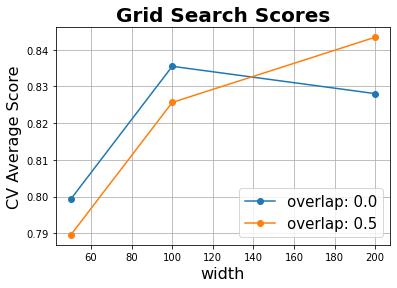

In [12]:
plot_grid_search(
    clf.cv_results_, 
    par_grid['seg__width'],
    par_grid['seg__overlap'], 
    'width', 
    'overlap'
)
plt.show()